# <center>感知机</center>

## 模型
$$f(x) = sign(x \cdot w)$$
$$
sign(x)=
    \begin{cases}
        -1, \quad & \text{if x < 0} \\
        +1, \quad & \text{if x $\geq$ 0} \\
    \end{cases}
$$

## 策略
最小化损失函数
$$\underset {w}{min}L(w)=-\sum_{x_i \in M} y_i (x_i \cdot w) , \text {M为误分类的数据集}$$

## 算法
随机梯度下降法(Stochastic Gradient Descent)

对于一个点$\frac{\partial{L}}{\partial{w}} = - y_{i} x_{i}$

随机抽取一个误分类点使其梯度下降:$w = w - \alpha \frac{\partial{L}}{\partial{w}} = w - \alpha (- y_{i}  x_{i})$

当实例点被误分类，即位于分离超平面的错误侧，则调整$w$的值，使分离超平面向该误分类点的一侧移动，直至误分类点被正确分类

***
---
___

### 画出超平面(本例中为二维空间中的直线)
$$x_{i}.T \cdot w = 0$$
$$x_{i}.T = [ 1 , x , y ]$$
所以
$$1*w[0] + x*w[1] + y*w[2] = 0$$
$$y = \frac{w[0] + x*w[1]}{-w[2]}$$

epoch:45
count:164
model.w:[-0.43415816 -0.08031007  0.16683476]


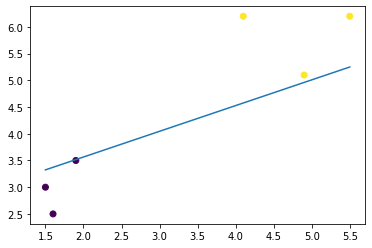

In [11]:
import matplotlib.pyplot as plt
import numpy as np


class Perceptron:

    def __init__(self):
        self.learning_rate = 0.01
        self.epochs = 1000
        self.w = None

    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.w = np.random.randn(X.shape[1])
        all_right = False
        count = 0
        epoch = 1
        while not all_right and epoch < self.epochs:
            all_right = True
            for r in range(len(X)):
                xi = X[r]
                yi = y[r]
                if yi * np.dot(xi, self.w) <= 0:
                    all_right = False
                    self.w = self.w - self.learning_rate * (-yi * xi)
                    count += 1
            epoch += 1
        print(f'epoch:{epoch}')
        print(f'count:{count}')

    def predict(self, x):
        x = np.concatenate([1.0], x)
        return 1 if np.dot(self.w, x) >= 0 else -1


def create_data():
    X = np.array([[1.5, 3.0], [1.6, 2.5], [1.9, 3.5], [4.1, 6.2], [4.9, 5.1], [5.5, 6.2]])
    y = np.array([-1, -1, -1, 1, 1, 1])
    return X, y


X, y = create_data()

model = Perceptron()
model.fit(X, y)
print(f'model.w:{model.w}')

# data
plt.scatter(X[:, 0], X[:, 1], c=y)
# 分隔线
plt.plot(X[:, 0], (model.w[0] + X[:, 0] * model.w[1]) / (-model.w[2]))
